<a href="https://colab.research.google.com/github/kyashhh/ETH-Price-Pridiction/blob/main/ETH_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Support Vector Regression**


In [1]:
#Importing libraries and packages
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Uploading database
from google.colab import files
files.upload()

Saving ETH-INR.csv to ETH-INR.csv


{'ETH-INR.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-11-11,19455.863281,20815.558594,19430.189453,20504.613281,20504.613281,54884332639\n2017-11-12,20505.201172,20796.009766,19451.107422,20063.285156,20063.285156,105134352629\n2017-11-13,20005.748047,21399.521484,20005.748047,20722.728516,20722.728516,68170861653\n2017-11-14,20725.802734,22287.546875,20725.802734,22081.068359,22081.068359,69957072000\n2017-11-15,22102.845703,22277.746094,21523.595703,21754.876953,21754.876953,47161182116\n2017-11-16,21760.490234,21957.906250,21105.582031,21606.029297,21606.029297,52052714705\n2017-11-17,21556.603516,21776.009766,21292.271484,21608.935547,21608.935547,40418861810\n2017-11-18,21582.021484,22728.535156,21302.933594,22598.255859,22598.255859,42233029830\n2017-11-19,22584.539063,24137.626953,22411.546875,23038.632813,23038.632813,76811264260\n2017-11-20,23019.650391,24224.257813,22967.318359,23872.291016,23872.291016,52533423086\n2017-11-21,23918.701172,24245.935547,22799.42773

In [3]:
#Dataframe assignment 
df = pd.read_csv('ETH-INR.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2017-11-11,2017-11-11,19455.863281,20815.558594,19430.189453,20504.613281,20504.613281,54884332639
2017-11-12,2017-11-12,20505.201172,20796.009766,19451.107422,20063.285156,20063.285156,105134352629
2017-11-13,2017-11-13,20005.748047,21399.521484,20005.748047,20722.728516,20722.728516,68170861653
2017-11-14,2017-11-14,20725.802734,22287.546875,20725.802734,22081.068359,22081.068359,69957072000
2017-11-15,2017-11-15,22102.845703,22277.746094,21523.595703,21754.876953,21754.876953,47161182116
...,...,...,...,...,...,...,...
2022-05-05,2022-05-05,223462.515625,224126.312500,206934.781250,210430.390625,210430.390625,1733135833232
2022-05-06,2022-05-06,210408.843750,210886.953125,203677.578125,207387.046875,207387.046875,1618138949356
2022-05-07,2022-05-07,207387.984375,207515.796875,200041.390625,202855.531250,202855.531250,1028807261176
2022-05-08,2022-05-08,202857.750000,203066.187500,192261.937500,193738.046875,193738.046875,1600895764300


In [4]:
future_days = 5

In [5]:
#Creating a new column that we use for prediction 
df[str(future_days)+'_Day_Price_Forcast'] = df[['Close']].shift(-future_days)
df[['Close', str(future_days)+'_Day_Price_Forcast']]

,Close,5_Day_Price_Forcast
2017-11-11,20504.613281,21606.029297
2017-11-12,20063.285156,21608.935547
2017-11-13,20722.728516,22598.255859
2017-11-14,22081.068359,23038.632813
2017-11-15,21754.876953,23872.291016
...,...,...
2022-05-05,210430.390625,NaN
2022-05-06,207387.046875,NaN
2022-05-07,202855.531250,NaN
2022-05-08,193738.046875,NaN


In [6]:
#Taking a new aray 'X' and assigning our independent variable(Close price)
X = np.array(df[['Close']])
X = X[:len(df) - future_days]
print(X)

[[ 20504.613281]
 [ 20063.285156]
 [ 20722.728516]
 ...
 [218664.625   ]
 [212845.59375 ]
 [223494.296875]]


In [7]:
#Creating an array for use in showing our predictions
y = np.array(df[str(future_days)+'_Day_Price_Forcast'])
y = y[:df.shape[0] - future_days]
print(y)

[ 21606.029297  21608.935547  22598.255859 ... 202855.53125  193738.046875
 178403.390625]


In [8]:
#Spliting the Dataset into 80% train set and 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
#Using kernel= rbf(Radial basic function), C as 1e5(Causing overfitting in our model)
svr_rbf = SVR(kernel='rbf', C=1e5, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=100000.0, gamma=1e-05)

In [10]:
#Testing the accuracy of our model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print(svr_rbf_confidence)

0.8064305763304869


Recieving 80% as an accuracy, which is decent but cannot be considered good or reliable, also this model is overfitted too, so using svr wasn't effiecent in our dataset

In [11]:
#Printing our predictions and original data
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
print(" ")
print(y_test)

[267741.3124696   10630.46025895  11951.58742793 164691.62466385
  46315.21958673   9535.9558601  229651.16417883  11287.77613688
  12824.07860383  17806.14961053  40237.91280048  48019.56791733
  80842.0654586   46514.68348102  17985.7569214    9014.97417768
  12762.47337741  10622.08162614 270813.79703917 159010.28299683
 153844.11204733 142775.5976318    8886.11342867  11494.50588456
  12654.44872109 194743.56165399  16494.18213538  16944.63906673
  32371.47608853  17919.21990418   7527.39325383 146040.53122187
  13660.81465706  12389.10591279 163276.01505624  65549.43939324
 195949.53044231   9088.64328419 178791.64656801  37418.53511607
  18038.52510975  19216.69976944 152117.01601059  47733.64787148
  14731.73170075 263673.13219792  15166.23189115 243441.82971568
  28887.39236137  42353.69546101  13023.78515487 188826.84042789
 152668.05573424  21564.41686649  53040.77080799  15604.87548236
  17517.11943184  63253.62549261  16335.87374687 144049.54031288
  50068.40885802  19345.6

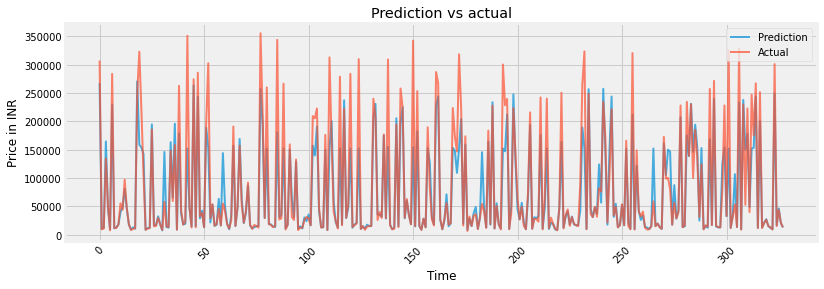

In [12]:
#Checking the accuracy of our model by visualization of group
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Actual', lw=2, alpha=0.7)
plt.title('Prediction vs actual')
plt.ylabel('Price in INR')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()